# Concepts
### 1 -  Stationarity
### 2 -  Stationarity Test
### 3 -  Non-Stationarity to Stationarity Test

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("airline-passenger-traffic.csv")
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')

In [3]:
# Null Treatment
data = data.assign(Passengers = data.Passengers.interpolate(method='linear'))

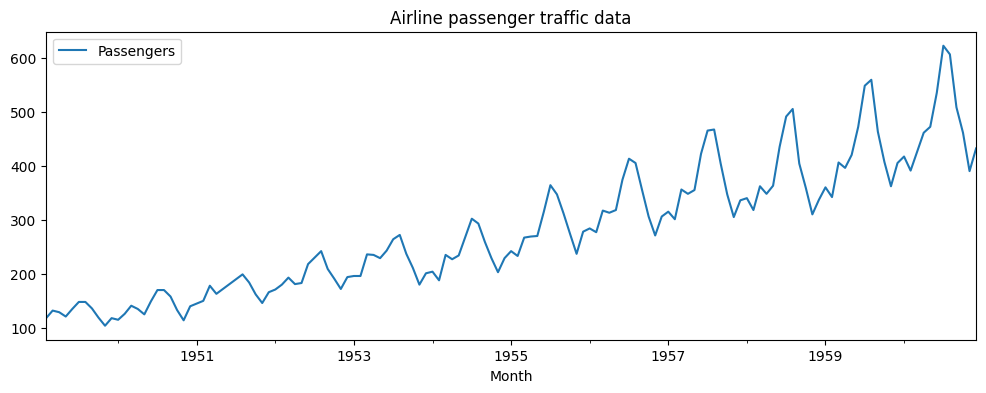

In [4]:
data['Passengers'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Airline passenger traffic data")
plt.show()

## Augmented Dickey-Fuller (ADF) Test

In [5]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])
print("Adf Stats", adf_test[0])
print("Critical Value at 0.05: %.2f" % adf_test[4]['5%'])
print("P-value", adf_test[1])

# Interpretetion is that P_value > 0.05 then the time series is not stationary
# Here p-value is .99 hence not stationary

Adf Stats 0.8662877034110323
Critical Value at 0.05: -2.88
P-value 0.9926342166999336


### KPSS Test

In [6]:
from statsmodels.tsa.stattools import kpss
adf_test = kpss(data['Passengers'])
print("Kpss Stats", adf_test[0], adf_test)
print("Critical Value at 0.05: %.2f" % adf_test[3]['5%'])
print("P-value", adf_test[1])

# Interpretetion is that P_value > 0.05 then the time series is stationary
# Here p-value is .01 hence not stationary

Kpss Stats 1.6384892740630919 (1.6384892740630919, 0.01, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Critical Value at 0.05: 0.46
P-value 0.01


/var/folders/mj/1_pdwz1516v0pv48mp_d06kc0000gr/T/ipykernel_16387/1684791833.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  adf_test = kpss(data['Passengers'])


In [7]:
## Exchange rate dataset
ed = pd.read_csv("exchange-rate-twi.csv")
ed = ed.set_index('Month')

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(ed['Exchange Rate TWI'])
print("Adf Stats", adf_test[0])
print("Critical Value at 0.05: %.2f" % adf_test[4]['5%'])
print("P-value", adf_test[1])

from statsmodels.tsa.stattools import kpss
adf_test = kpss(ed['Exchange Rate TWI'])
print("Kpss Stats", adf_test[0])
print("Critical Value at 0.05: %.2f" % adf_test[3]['5%'])
print("P-value", adf_test[1])



Adf Stats -0.8054678720541533
Critical Value at 0.05: -2.87
P-value 0.817510642668505
Kpss Stats 2.6144892040709946
Critical Value at 0.05: 0.46
P-value 0.01


/var/folders/mj/1_pdwz1516v0pv48mp_d06kc0000gr/T/ipykernel_16387/3838865497.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  adf_test = kpss(ed['Exchange Rate TWI'])


### Non Stationary to Stationary
- Differencing
- Transformation

#### Box-Cox Transformation

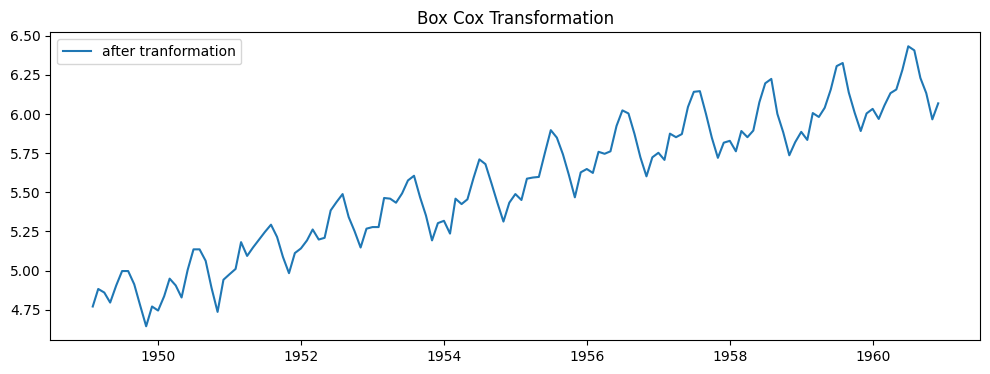

In [9]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'],lmbda=0), index=data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='after tranformation')
plt.legend(loc='best')
plt.title("Box Cox Transformation")
plt.show()

### Differencing

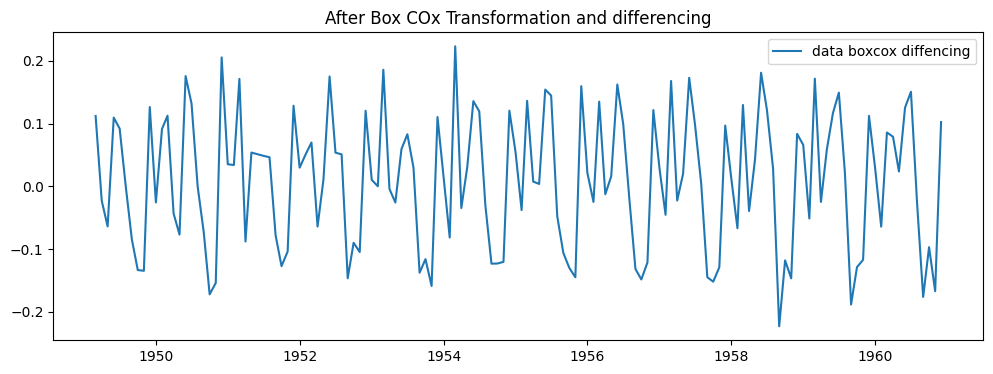

In [10]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='data boxcox diffencing')
plt.legend(loc='best')
plt.title("After Box COx Transformation and differencing")
plt.show()

In [11]:
adf_test = adfuller(data_boxcox_diff)
print("Adf Stats", adf_test[0])
print("Critical Value at 0.05: %.2f" % adf_test[4]['5%'])
print("P-value", adf_test[1])

adf_test = kpss(data_boxcox_diff)
print("Kpss Stats", adf_test[0], adf_test)
print("Critical Value at 0.05: %.2f" % adf_test[3]['5%'])
print("P-value", adf_test[1])

Adf Stats -3.267369883256623
Critical Value at 0.05: -2.88
P-value 0.016401554834735387
Kpss Stats 0.034137026221196555 (0.034137026221196555, 0.1, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Critical Value at 0.05: 0.46
P-value 0.1


/var/folders/mj/1_pdwz1516v0pv48mp_d06kc0000gr/T/ipykernel_16387/593418685.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  adf_test = kpss(data_boxcox_diff)


## AutoCorrelation Function Plot

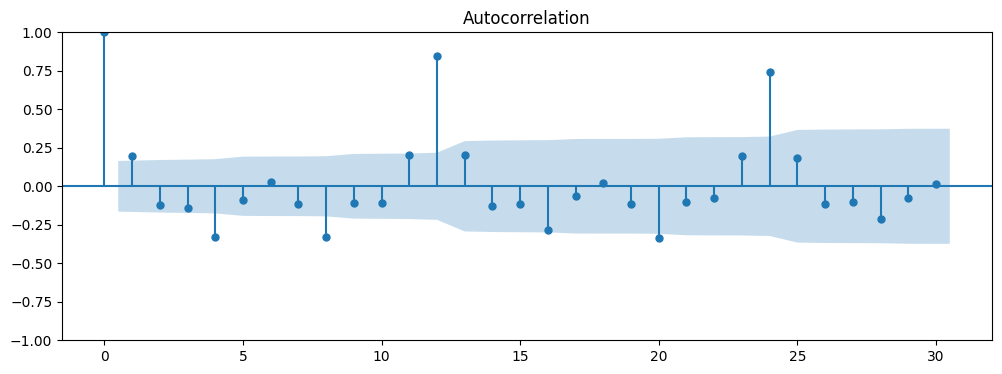

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax = plt.gca(), lags=30)
plt.show()

## Partial AutoCorrelation Function Plot

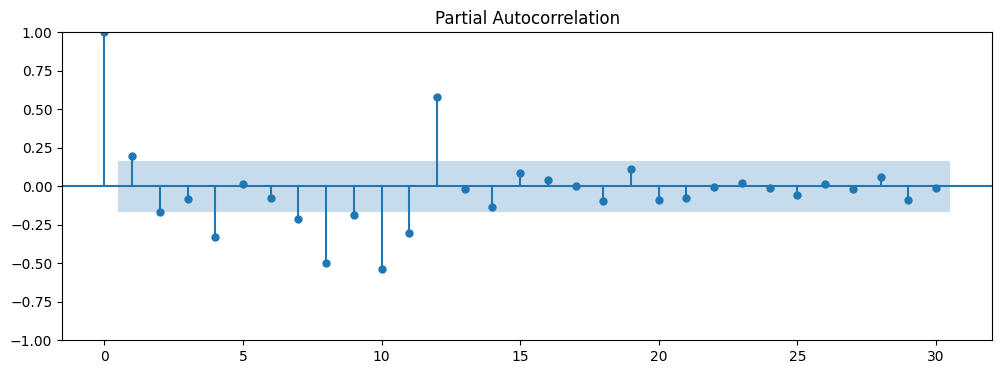

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax = plt.gca(), lags=30)
plt.show()

## Split into training and test set

In [40]:
train_len = 116

In [41]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [42]:
test_data_boxcox_diff

Month
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
1959-02-01   -0.051293
1959-03-01    0.171542
1959-04-01   -0.024939
1959-05-01    0.058841
1959-06-01    0.116724
1959-07-01    0.149296
1959-08-01    0.019874
1959-09-01   -0.188422
1959-10-01   -0.128914
1959-11-01   -0.117169
1959-12-01    0.112243
1960-01-01    0.029199
1960-02-01   -0.064379
1960-03-01    0.085732
1960-04-01    0.078959
1960-05-01    0.023581
1960-06-01    0.125288
1960-07-01    0.150673
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

## Auto Regression Method

In [43]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const     0.010473
ar.L1     0.163943
sigma2    0.010734
dtype: float64


/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Recover Original Timeseries Forecast

In [44]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcoxx_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcoxx'] = y_hat_ar['ar_forecast_boxcoxx_diff'].cumsum()
y_hat_ar['ar_forecast_boxcoxx'] = y_hat_ar['ar_forecast_boxcoxx'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcoxx']) # Actual forecast for due to box cox transformation

### Plot train, test and forecast

In [45]:
train = data[:train_len]
test = data[train_len:]

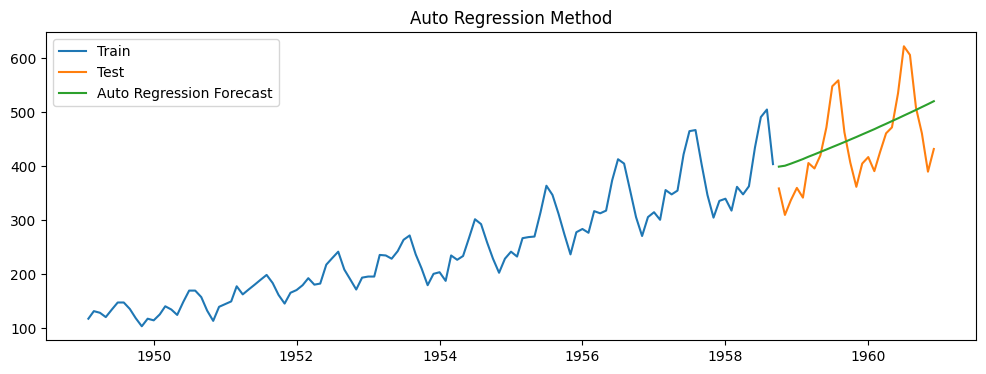

In [46]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title("Auto Regression Method")
plt.show()

In [ ]:
# calculate rmse, mape

# ARMA Model

In [47]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const     0.010399
ar.L1    -0.532179
ma.L1     0.809964
sigma2    0.009962
dtype: float64


/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['ar_forecast_boxcoxx_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['ar_forecast_boxcoxx'] = y_hat_arma['ar_forecast_boxcoxx_diff'].cumsum()
y_hat_arma['ar_forecast_boxcoxx'] = y_hat_arma['ar_forecast_boxcoxx'].add(data_boxcox[0])
y_hat_arma['ar_forecast'] = np.exp(y_hat_arma['ar_forecast_boxcoxx'])

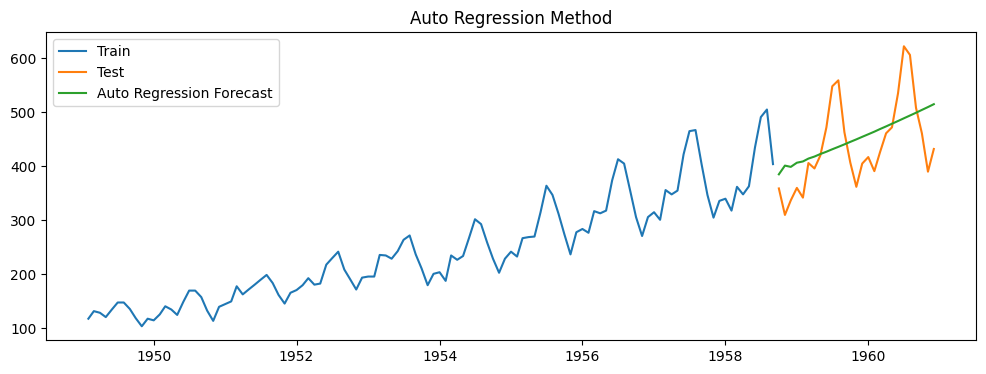

In [50]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arma['ar_forecast'][test.index.min():], label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title("Auto Regression Method")
plt.show()

In [51]:
# calculate rmse, mape

# Arima Model

In [55]:
# handles differenceing internally
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_boxcox, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

ar.L1    -0.525564
ma.L1     0.808249
sigma2    0.010039
dtype: float64


/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/sahulaks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['ar_forecast_boxcoxx_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['ar_forecast_boxcoxx'] = y_hat_arima['ar_forecast_boxcoxx_diff'].cumsum()
y_hat_arima['ar_forecast_boxcoxx'] = y_hat_arima['ar_forecast_boxcoxx'].add(data_boxcox[0])
y_hat_arima['ar_forecast'] = np.exp(y_hat_arima['ar_forecast_boxcoxx'])

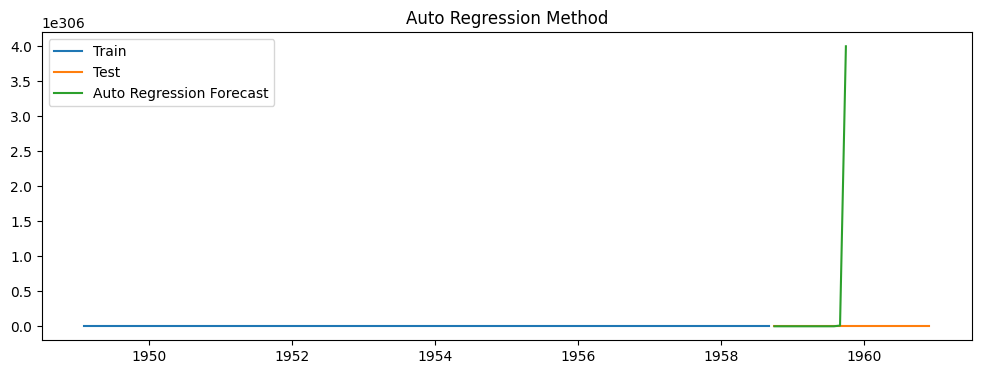

In [57]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['ar_forecast'][test.index.min():], label='Arima Forecast')
plt.legend(loc='best')
plt.title("Auto Regression Method")
plt.show()

In [ ]:
# Calculate Mape and RMSe

Additional Reading materials: https://otexts.com/fpp2/advanced.html

In [58]:
8.01 * 9.5


76.095